In [1]:
import artm
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batch_vectorizer = artm.BatchVectorizer(data_format='vowpal_wabbit', data_path='vw.txt', 
                                        target_folder='data/batches', collection_name='criminal_code')

In [3]:
dictionary = artm.Dictionary()

In [4]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(33)],
                       scores=[artm.PerplexityScore(name='PerplexityScore', dictionary=dictionary)],
                       regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15)], cache_theta=True)

In [5]:
if not os.path.isfile('data/dictionary.dict'):
    dictionary.gather(data_path=batch_vectorizer.data_path)
    dictionary.save(dictionary_path='data/dictionary.dict')
dictionary.load(dictionary_path='data/dictionary.dict')

In [6]:
model_artm.initialize(dictionary=dictionary)

In [7]:
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3))

In [8]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.1))
model_artm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=1.5e+5))

In [9]:
model_artm.regularizers['SparsePhi'].tau = -0.2
model_artm.regularizers['SparseTheta'].tau = -0.2
model_artm.regularizers['DecorrelatorPhi'].tau = 2.5e+5
model_artm.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))

In [10]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

Sparsity Phi: 0.999
Sparsity Theta: 0.936
Kernel contrast: 0.545
Kernel purity: 0.545
Perplexity: 314.626


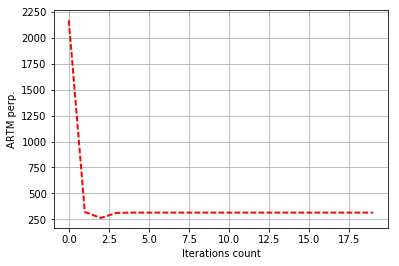

In [11]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f}'.format(model_artm.score_tracker['SparsityPhiScore'].last_value))

    print('Sparsity Theta: {0:.3f}'.format(model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f}'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f}'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f}'.format(
        model_artm.score_tracker['PerplexityScore'].last_value))

    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel('ARTM perp.')
    plt.grid(True)
    plt.show()
    
print_measures(model_artm)

In [19]:
for topic_name in model_artm.score_tracker['TopTokensScore'].last_tokens:
    print(topic_name + ':', end=' '),
    print(', '.join(model_artm.score_tracker['TopTokensScore'].last_tokens[topic_name]))

topic_27: представление, условный, применяться
topic_10: экстремистский
topic_21: положение, служебный, угроза, должностной, указанный, опасный
topic_32: объект, наследие, реестр, владелец, единый, конфискация
topic_17: правило, акт, валюта, родитель, удостоверять, причина
topic_11: прекурсор
topic_7: запрещать, четырнадцатилетний
topic_0: основной, наркомания, реабилитация
topic_25: референдум, условие
topic_15: помощь, марка, стационарный, маркировка, акцизный
topic_30: получение, требование, распространение, признак, принуждение, информационный
topic_8: особенный, совокупность, строгий, смертный, казнь, максимальный
topic_9: самоубийство
topic_28: иностранный, воспитательный, гражданство, превышение
topic_1: добровольно, хищение, растение, вымогательство, дача, полтора
topic_29: террористический
topic_13: место, дисциплинарный, военнослужащий, призыв, давность, прохождение
topic_12: условно, учреждение, оказывать, освобождение, половой
